In [2]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.neural_network import MLPClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score, f1_score

In [4]:
file_tag = 'nyc_collisions_scaled_zscore'
filename = 'data/nyc_collisions_scaled_zscore'
target = 'PERSON_INJURY'

train: DataFrame = read_csv(f'{filename}_train_smote.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

lr_type = ['constant', 'invscaling', 'adaptive']
max_iter = [100, 300, 500, 750, 1000, 2500, 5000]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

0
0.1
0.5
0.9
1
0.1
0.5
0.9
2
0.1
0.5
0.9


<Figure size 600x450 with 0 Axes>

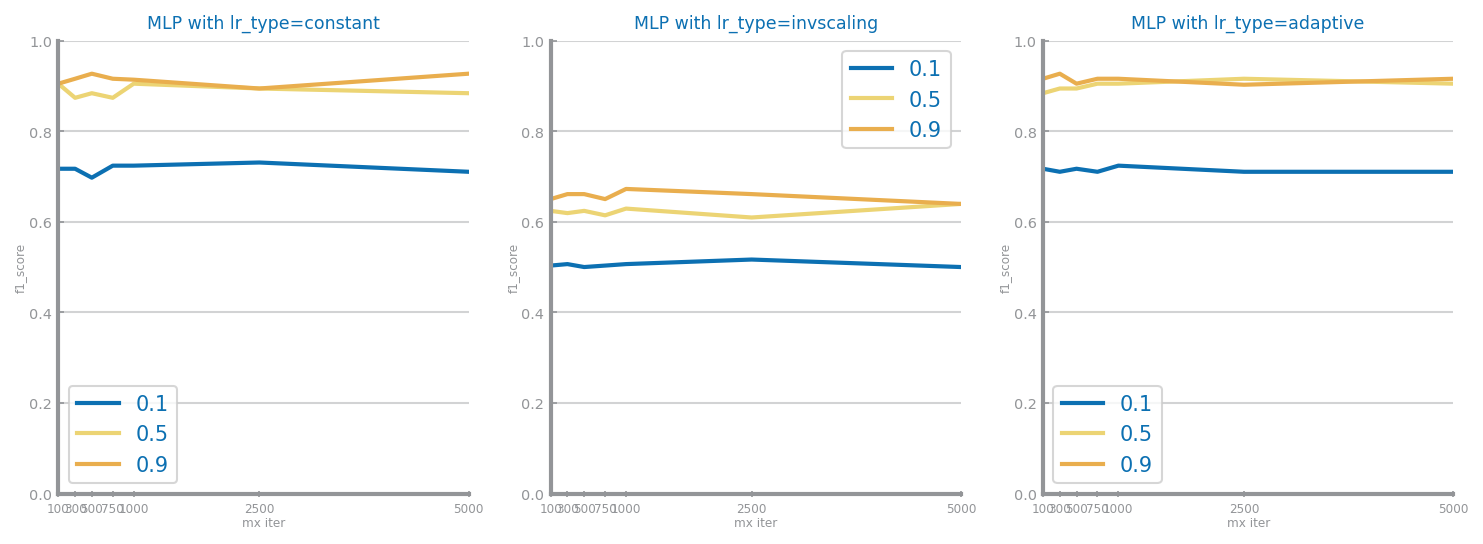

Best results with lr_type=constant, learning rate=0.9 and 500 max iter, with accuracy=0.926829268292683


In [3]:
cols = len(lr_type)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(lr_type)):
    print(k)
    d = lr_type[k]
    values = {}
    for lr in learning_rate:
        print(lr)
        yvalues = []
        for n in max_iter:
            mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=d,
                                learning_rate_init=lr, max_iter=n, verbose=False)
            mlp.fit(trnX, trnY)
            prdY = mlp.predict(tstX)
            yvalues.append(f1_score(tstY, prdY, pos_label="Killed"))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_model = mlp
        values[lr] = yvalues
    multiple_line_chart(max_iter, values, ax=axs[0, k], title=f'MLP with lr_type={d}',
                           xlabel='mx iter', ylabel='f1_score', percentage=True)
savefig(f'lab7_images/{file_tag}_mlp_study.png')
show()
print(f'Best results with lr_type={best[0]}, learning rate={best[1]} and {best[2]} max iter, with accuracy={last_best}')

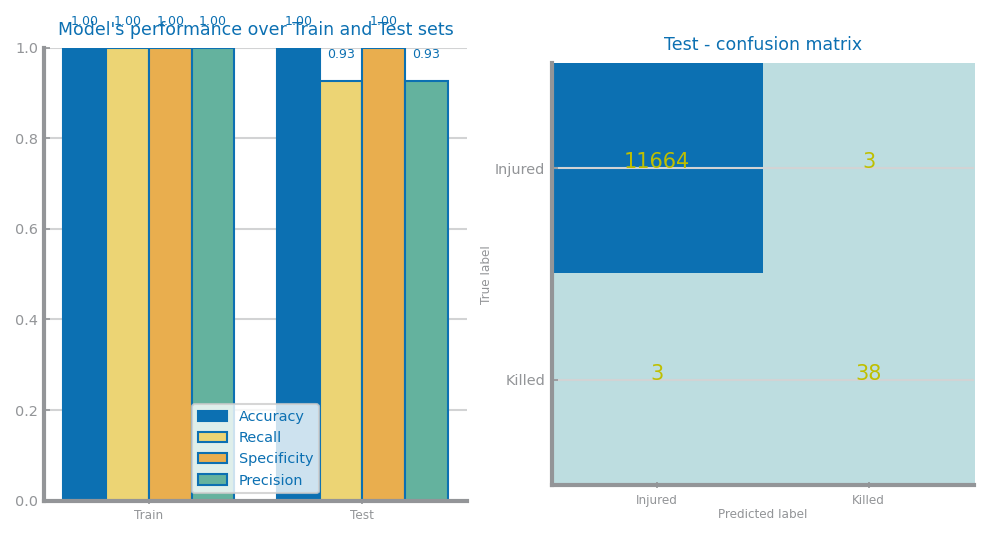

In [4]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'lab7_images/{file_tag}_mlp_best.png')
show()

### Loss Evolution

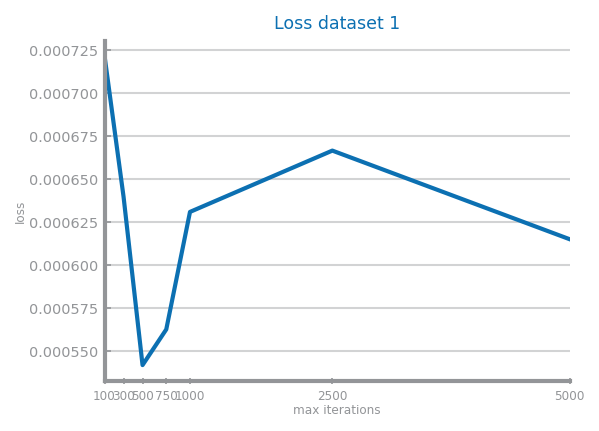

In [5]:
from libs.ds_charts import plot_line
max_iter = [100, 300, 500, 750, 1000, 2500, 5000]
loss = []
for i in max_iter:
    mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate='constant', learning_rate_init=0.9, max_iter=i, verbose=False)
    mlp.fit(trnX, trnY)
    mlp.predict(tstX)
    loss.append(mlp.loss_)
plot_line(max_iter,loss,title="Loss dataset 1",xlabel='max iterations', ylabel='loss')
show()
    

### Feature Selection

### Overfitting

AttributeError: module 'matplotlib' has no attribute 'savefig'

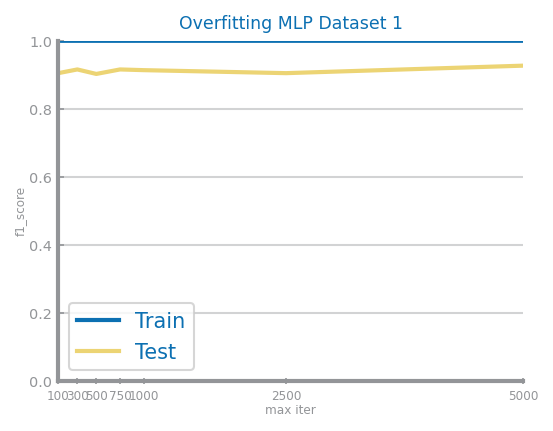

In [16]:
#from libs.ds_charts import plot_overfitting_study
import matplotlib as plt

lr_type = 'adaptive'
lr = 0.9
eval_metric = f1_score
y_tst_values = []
y_trn_values = []
for n in max_iter:
    mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=lr_type, learning_rate_init=lr, max_iter=n, verbose=False)
    mlp.fit(trnX, trnY)
    prd_tst_Y = mlp.predict(tstX)
    prd_trn_Y = mlp.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y, pos_label="Killed"))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y, pos_label="Killed"))
evals = {'Train': y_trn_values, 'Test': y_tst_values}
multiple_line_chart(max_iter, evals, ax = None, title=f'Overfitting MLP Dataset 1', xlabel='max iter', ylabel='f1_score', percentage=True)
